In [3]:
import pandas as pd
import seaborn as sns; sns.set
import matplotlib.pyplot as plt #Library responsável pelos gráfiocos
import datetime as dt
import matplotlib
matplotlib.rcParams['figure.figsize' ]= [36,16]

In [4]:
def consulta_bc(codigo_bcb):
    url = 'http://api.bcb.gov.br/dados/serie/bcdata.sgs.{}/dados?formato=json'.format(codigo_bcb)
    df = pd.read_json(url)
    df['data'] = pd.to_datetime(df['data'],dayfirst=True)
    df.set_index('data',inplace=True)
    return df


In [5]:
ipca = consulta_bc(433) #índice nacional de preços ao consumidor IBGE
ipca_12 = consulta_bc(13522) # índice nacional de preços ao consumidor - amnplo (IPCA) - em 12 meses IBGE
selic = consulta_bc(1178) # Taxa de juros - Selic anualizada base 252
Selic_meta = consulta_bc(432) # Taxa de juros = Meta Selic definida pelo Copom
cdi = consulta_bc(4389) # Taxa de juros - CDI anualizada base 252
cdi_dia = consulta_bc(12) # Taxa de juros - CDI % a. d.
cdi_acum_mes = consulta_bc(4391) # Taxa de juros - CDI acumulada no mês % a.m
cdi_acum_mes_anu = consulta_bc(4392) # Taxa de juros - CDI acmulado no mês anualizada base 252

In [6]:
ipca_alim = consulta_bc(1635)

In [7]:
ipca["valor"].describe()[2]

10.829948514571228

In [8]:
selic[selic.index == '2025-01-01']

,valor
data,


In [9]:
selic[selic.index == '2025-01-01']

,valor
data,


In [10]:
selic['Fator acumulação'] = [(1 + valor/100) ** (1/252) for valor in selic['valor'].values]

In [11]:
selic[selic.index == '2025-01-01']

,valor,Fator acumulação
data,,


In [12]:
selic

,valor,Fator acumulação
data,,
1986-06-04,17.80,1.000650
1986-06-05,18.50,1.000674
1986-06-06,18.31,1.000667
1986-06-09,18.76,1.000683
1986-06-10,18.40,1.000670
...,...,...
2023-04-14,13.65,1.000508
2023-04-17,13.65,1.000508
2023-04-18,13.65,1.000508


In [13]:
selic['VNA']= 0



In [14]:
print(len(selic))

9245


In [15]:
for i in range(len(selic)):
    if selic.index[i] == dt.datetime(2000, 7, 3):
        selic['VNA'].iloc[i] = 100
        
    elif selic.index[i] > dt.datetime(2000, 7, 3):
        selic['VNA'].iloc[i] = selic['VNA'].iloc[i-1] * selic['Fator acumulação'].iloc[i-1]

C:\Users\edson\AppData\Local\Temp\ipykernel_25452\2262691709.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selic['VNA'].iloc[i] = 100
C:\Users\edson\AppData\Local\Temp\ipykernel_25452\2262691709.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selic['VNA'].iloc[i] = selic['VNA'].iloc[i-1] * selic['Fator acumulação'].iloc[i-1]


In [16]:
ipca

,valor
data,
1980-01-01,6.62
1980-02-01,4.62
1980-03-01,6.04
1980-04-01,5.29
1980-05-01,5.70
...,...
2022-11-01,0.41
2022-12-01,0.62
2023-01-01,0.53


In [17]:
selic

,valor,Fator acumulação,VNA
data,,,
1986-06-04,17.80,1.000650,0.000000
1986-06-05,18.50,1.000674,0.000000
1986-06-06,18.31,1.000667,0.000000
1986-06-09,18.76,1.000683,0.000000
1986-06-10,18.40,1.000670,0.000000
...,...,...,...
2023-04-14,13.65,1.000508,1309.264138
2023-04-17,13.65,1.000508,1309.929087
2023-04-18,13.65,1.000508,1310.594375


In [18]:
list_didia = []
for i in range(len(cdi)):
    list_didia.append(100*((1+cdi['valor'][1]/100)**(1/252)-1))
cdi_dia = cdi.copy(deep=True)
cdi_dia['tx_dia'] = list_didia


In [19]:
cdi_dia

,valor,tx_dia
data,,
1986-03-06,18.72,0.06902
1986-03-10,18.99,0.06902
1986-03-12,18.51,0.06902
1986-03-14,17.67,0.06902
1986-03-17,18.75,0.06902
...,...,...
2023-04-14,13.65,0.06902
2023-04-17,13.65,0.06902
2023-04-18,13.65,0.06902


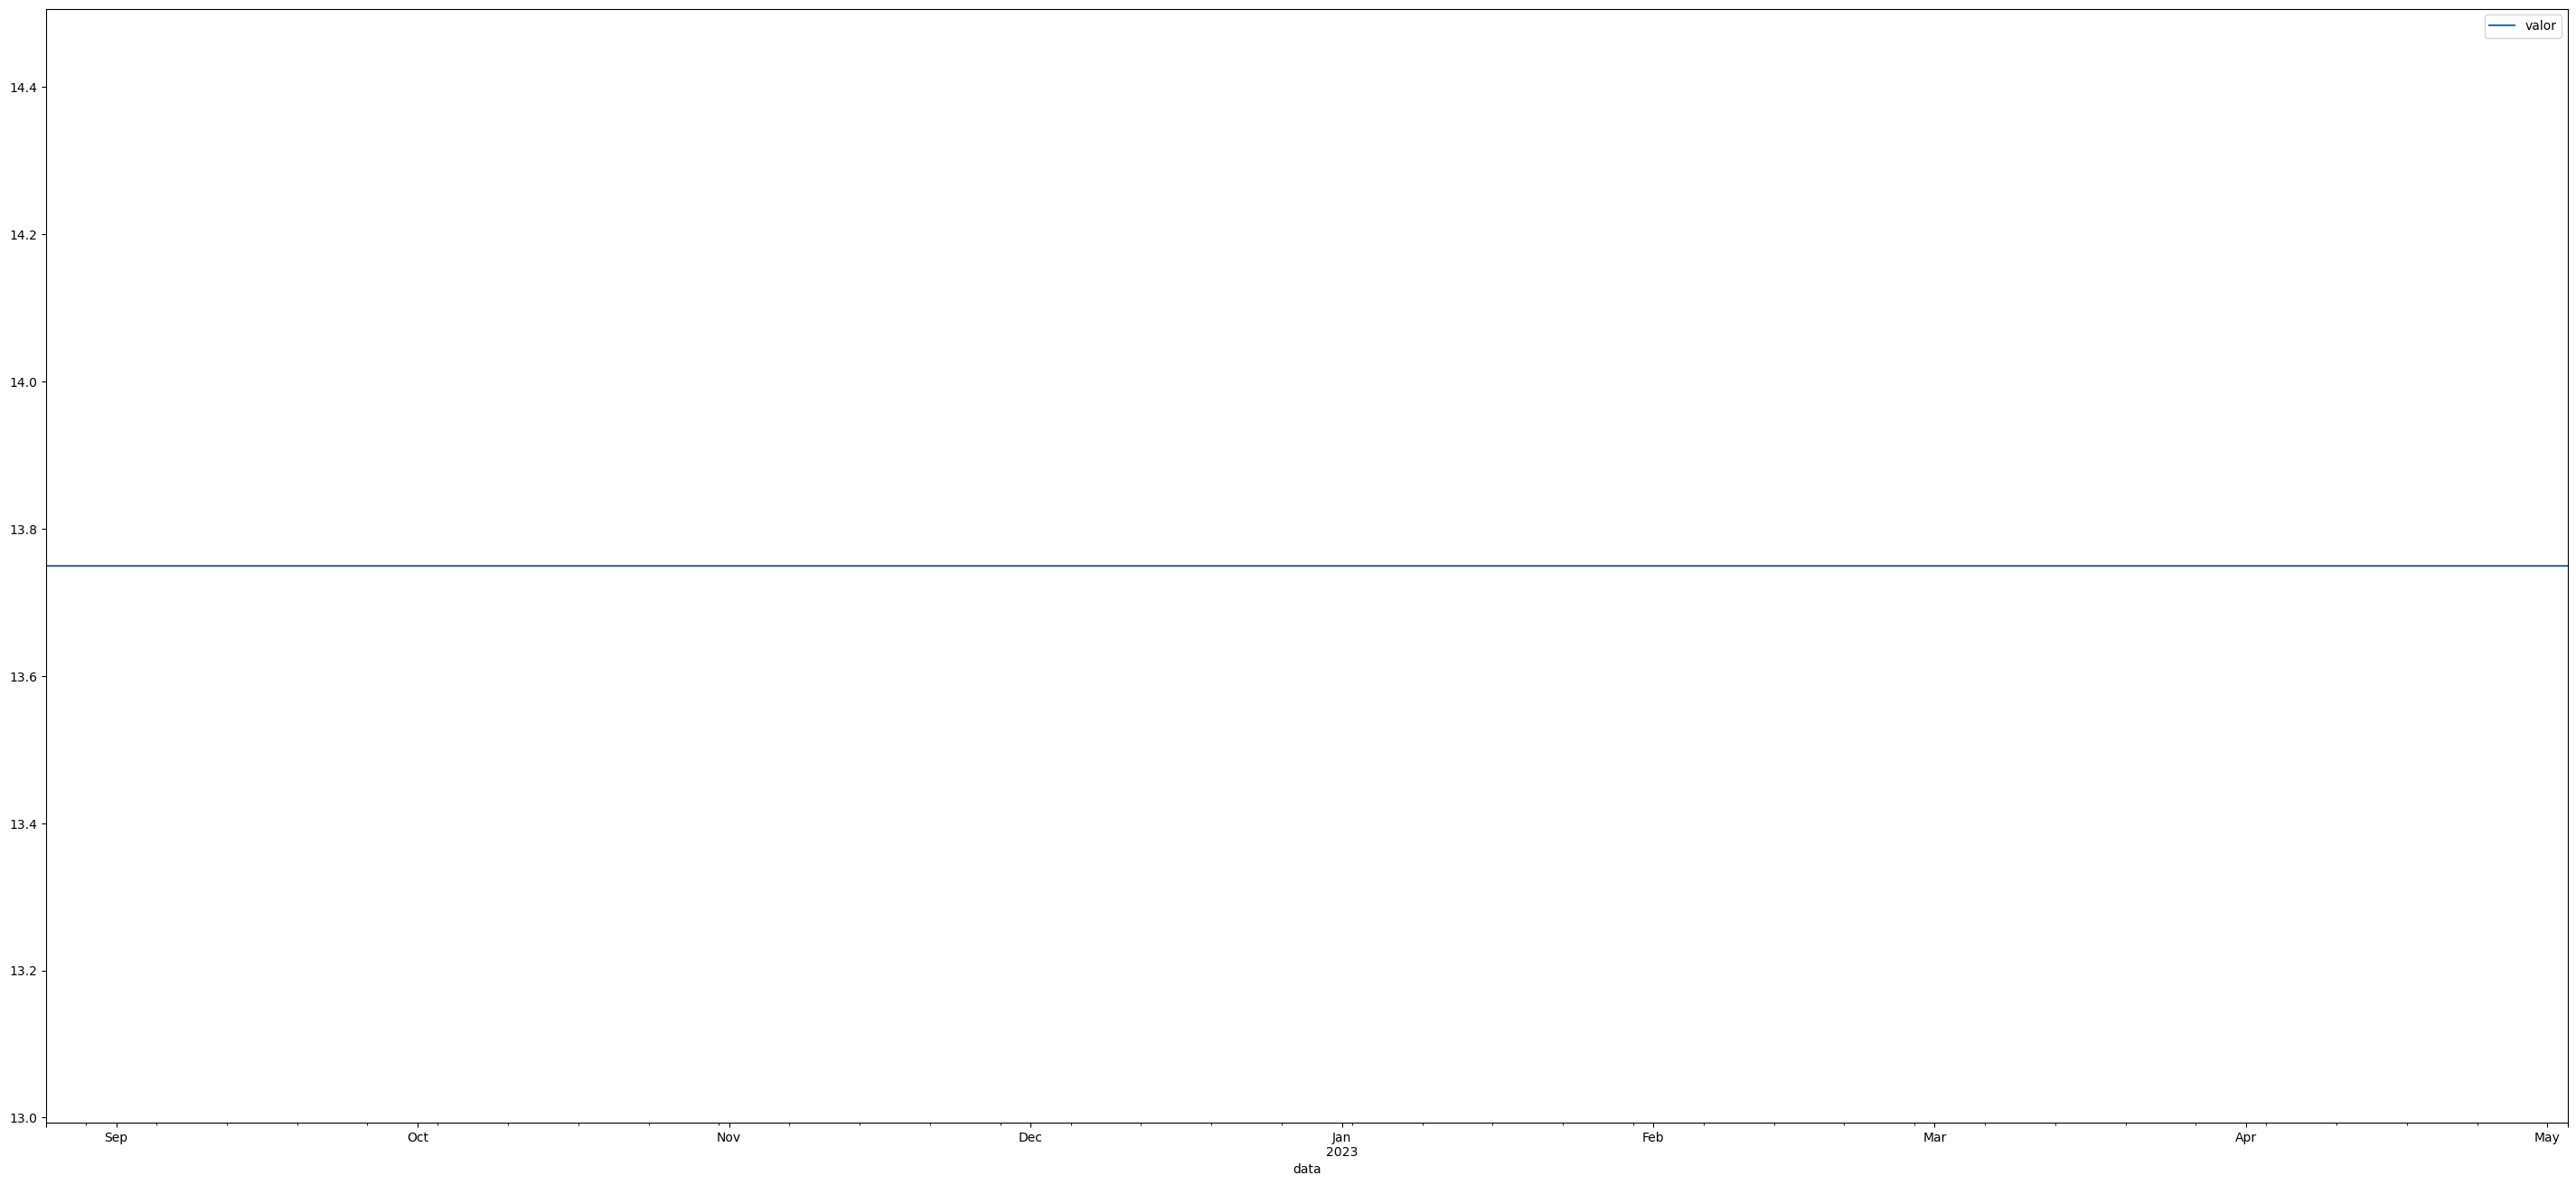

In [20]:
Selic_meta[-252:].plot();

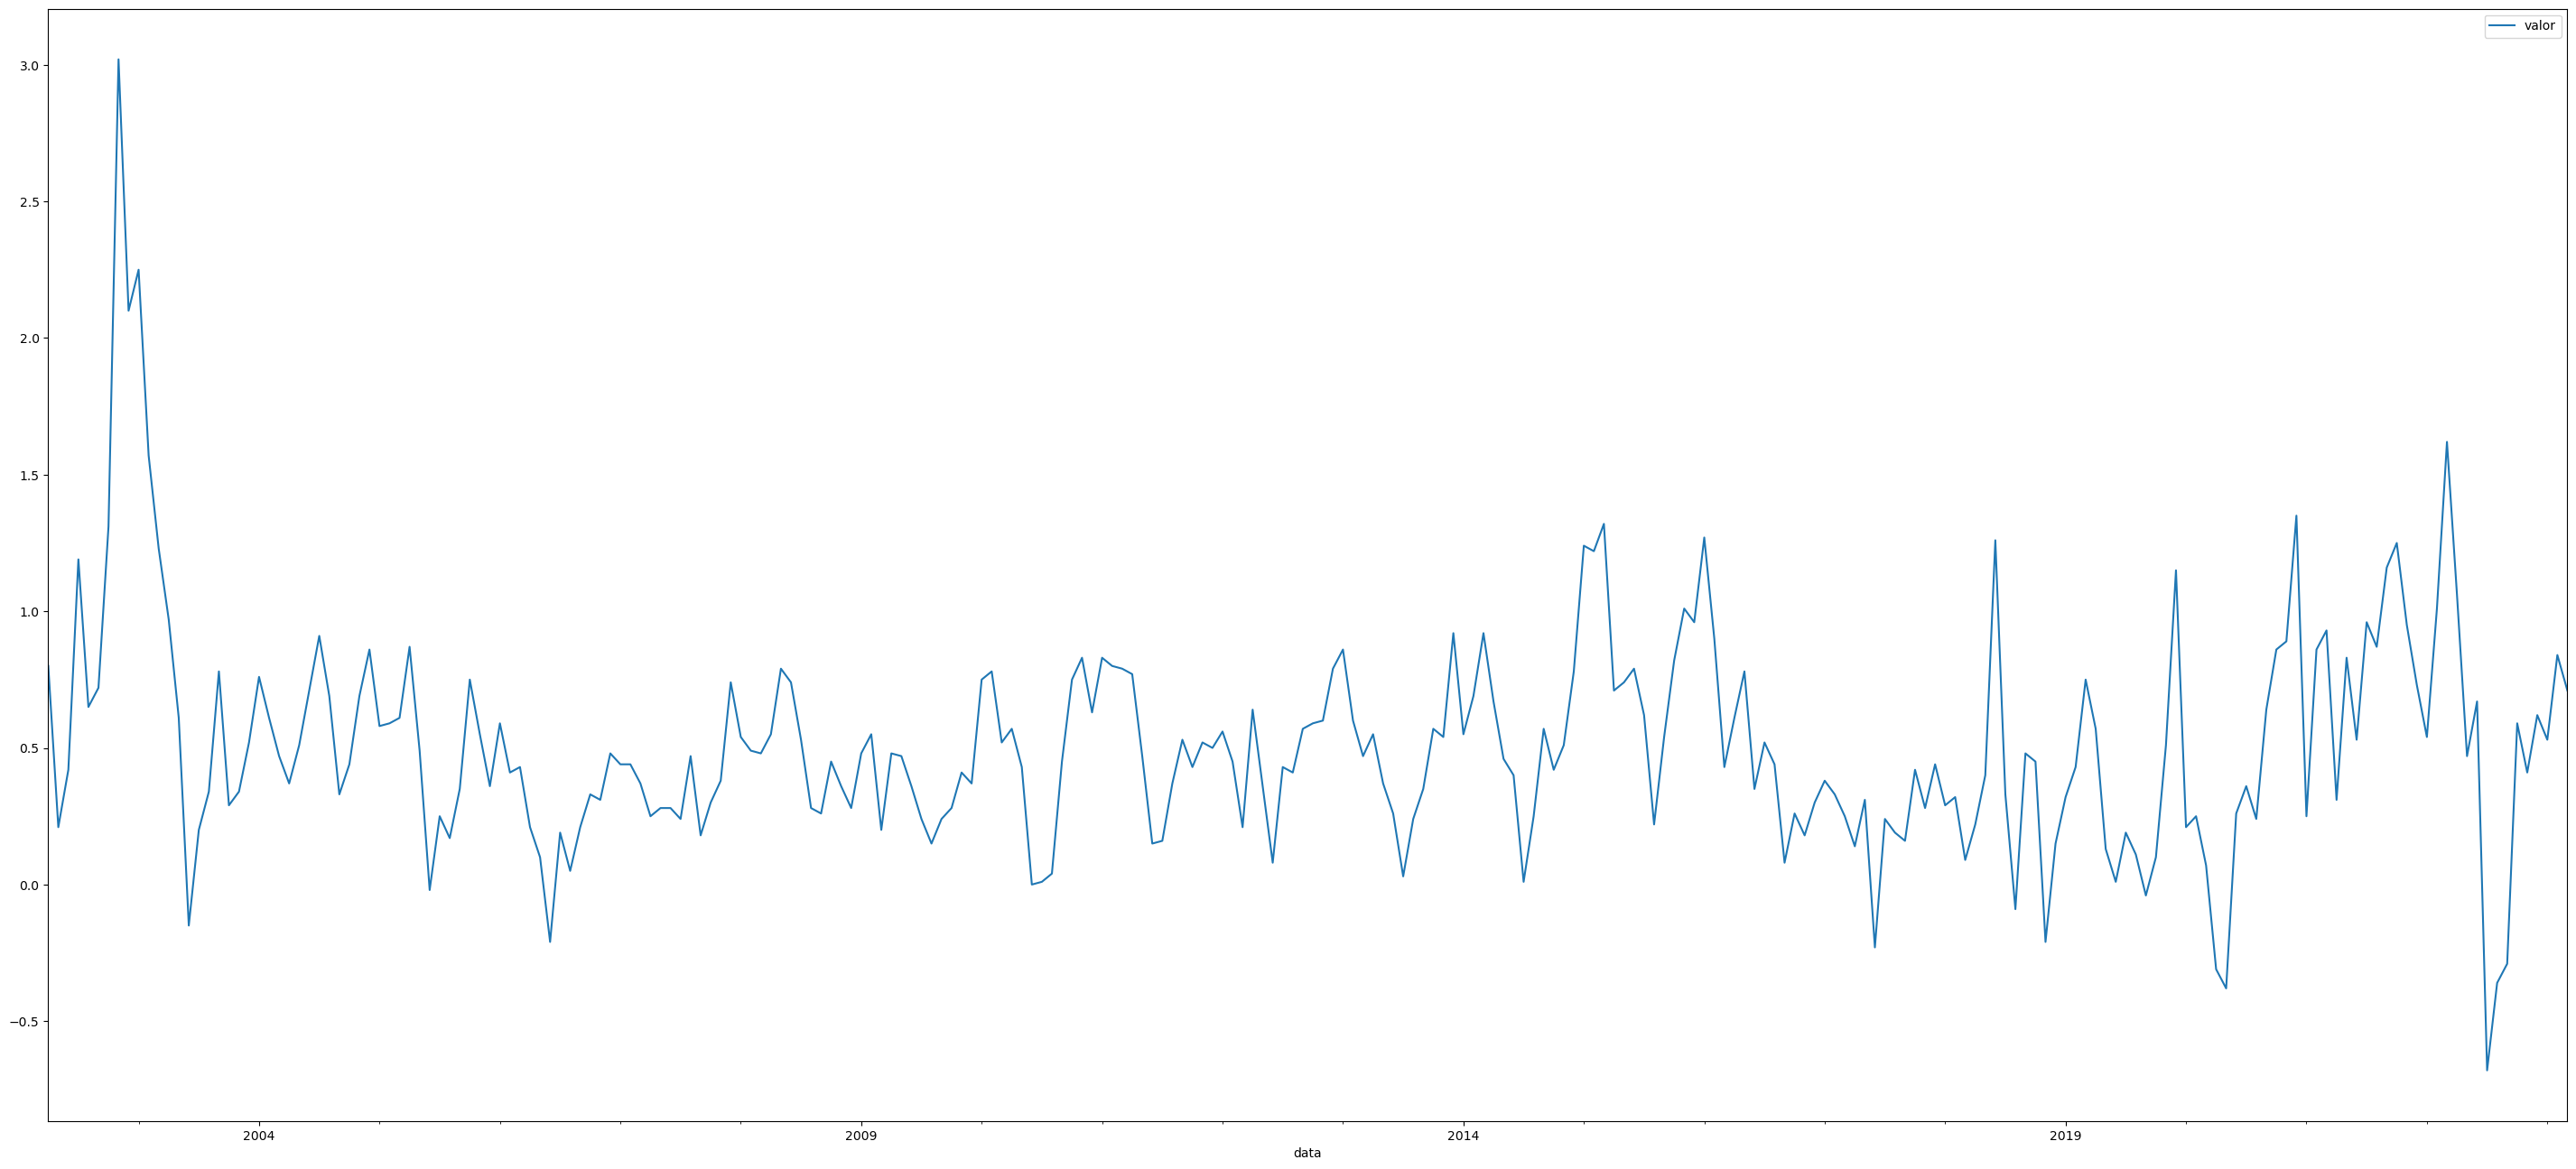

In [21]:
ipca[-252:].plot();

In [24]:
import sidrapy

In [25]:
data = sidrapy.get_table(table_code='1737', territorial_level=1, ibge_territorial_code='all', period="last 200")
data2 = data[['V','D2N','D3N']]
data2 = data2[data2['D3N']==data['D3N'][1]]
data2

,V,D2N,D3N
1,2580.5700000000000,agosto 2006,IPCA - Número-índice (base: dezembro de 1993 =...
7,2585.9900000000000,setembro 2006,IPCA - Número-índice (base: dezembro de 1993 =...
13,2594.5200000000000,outubro 2006,IPCA - Número-índice (base: dezembro de 1993 =...
19,2602.5600000000000,novembro 2006,IPCA - Número-índice (base: dezembro de 1993 =...
25,2615.0500000000000,dezembro 2006,IPCA - Número-índice (base: dezembro de 1993 =...
...,...,...,...
1171,6434.2000000000000,novembro 2022,IPCA - Número-índice (base: dezembro de 1993 =...
1177,6474.0900000000000,dezembro 2022,IPCA - Número-índice (base: dezembro de 1993 =...
1183,6508.4000000000000,janeiro 2023,IPCA - Número-índice (base: dezembro de 1993 =...
1189,6563.0700000000000,fevereiro 2023,IPCA - Número-índice (base: dezembro de 1993 =...
